In [ ]:
# Josh Kenn Viray
# 3CSC
# Formative 2.2
# flake8: noqa

In [ ]:
# =============================================================================
# 1. Import necessary libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score

data = load_breast_cancer(as_frame=True)
df = data.frame

# All features was used, but in reality EDA shouldve been performance
# but for the sake of the formative, we will be using all features
features = [
    "mean radius", "mean texture", "mean perimeter", "mean area", 
    "mean smoothness", "mean compactness", "mean concavity", 
    "mean concave points", "mean symmetry","mean fractal dimension", 
    
    "radius error", "texture error", "perimeter error",
    "area error", "smoothness error", "compactness error", 
    "concavity error", "concave points error", "symmetry error", 
    "fractal dimension error",
    
    "worst radius", "worst texture", "worst perimeter", "worst area", 
    "worst smoothness", "worst compactness", "worst concavity", 
    "worst concave points", "worst symmetry", "worst fractal dimension"
]
target = "target"

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [48]:
# =============================================================================
# 2. Select a Unique Randomization Seed
# =============================================================================

seed = 52
np.random.seed(seed)
# let n be the number of samples in the dataset, which n=30 was given
n = 30
# let i be the number of iterations asked, since there was no defined number
# make i = 1,000 :)
i = 1000 # honestly unsure if iteration is the same as sample size? 
         # "limit sample to n = 30" but no prompt on iteration was mentioned
         # so let's leave it at that ^^
         
# or just simply use the following
# n = i

In [49]:
# =============================================================================
# 2. Sample Train Data and Apply Standard Scaling
# =============================================================================

train_df = df.sample(n, random_state=seed)
print("Training Data Sample:")
train_df.head()


Training Data Sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,25.63,99.43,701.9,0.1425,0.25660,0.19350,0.12840,0.2849,0.09031,1
52,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,...,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408,1
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777,1
530,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,27.98,88.52,552.3,0.1349,0.18540,0.13660,0.10100,0.2478,0.07757,1
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802,1


In [50]:
# Create the feature matrix (X) and target vector (y) for training
X_train = train_df[features].values
y_train = train_df[target].values

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a bias (intercept) column to the scaled feature matrix
X_train_aug = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

In [51]:
# =============================================================================
# 3. Sample Train Data and Apply Standard Scaling
# =============================================================================

# Randomly sample 30 observations for training using the chosen seed.
train_df = df.sample(n, random_state=seed)
print("Training Data Sample:")
train_df.head()


Training Data Sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,25.63,99.43,701.9,0.1425,0.25660,0.19350,0.12840,0.2849,0.09031,1
52,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.06110,...,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408,1
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777,1
530,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,...,27.98,88.52,552.3,0.1349,0.18540,0.13660,0.10100,0.2478,0.07757,1
475,12.83,15.73,82.89,506.9,0.09040,0.08269,0.05835,0.03078,0.1705,0.05913,...,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802,1


In [52]:
# Create the feature matrix (X) and target vector (y) for training.
X_train = train_df[features].values
y_train = train_df[target].values

# Standardize the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add a bias (intercept) column to the scaled feature matrix.
X_train_aug = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]

In [53]:
# =============================================================================
# 4. Build the Weight Update Function (Gradient Descent for Logistic Regression)
# =============================================================================

def sigmoid(z): # 
    return 1 / (1 + np.exp(-z))

def logistic_gradient_descent(X, y, weights, learning_rate=0.01, iterations=i):

    weight_history = []
    loss_history = []
    
    for i in range(iterations):
        # Compute the linear combination
        z = X.dot(weights)
        # Compute predicted probabilities
        pred = sigmoid(z)
        # Compute binary cross-entropy loss
        loss = -np.mean(y * np.log(pred + 1e-15) + (1 - y) * np.log(1 - pred + 1e-15))
        loss_history.append(loss)
        
        # Compute gradient of the loss with respect to weights
        gradient = (1 / len(y)) * X.T.dot(pred - y)
        # Update weights
        weights = weights - learning_rate * gradient
        
        # Save weights for this iteration and print the update.
        weight_history.append(weights.copy())
        print(f"Iteration {i+1}: Weights = {weights}, Loss = {loss:.4f}")
    
    return weights, weight_history, loss_history

# Initialize weights (one for the bias plus one per feature).
initial_weights = np.zeros(X_train_aug.shape[1])

In [54]:
# =============================================================================
# 5. Display the Values of Weights
# =============================================================================

# Run gradient descent for logistic regression.
final_weights, weight_history, loss_history = logistic_gradient_descent(
                                              X_train_aug, y_train, initial_weights, 
                                              learning_rate=0.01, iterations=i)

Iteration 1: Weights = [ 2.33333333e-03 -3.70079727e-03 -2.12834601e-03 -3.68685806e-03
 -3.83184497e-03  2.69207486e-05 -2.22476466e-03 -2.83348893e-03
 -3.10939181e-03 -1.17389006e-03  1.23824918e-03 -2.75178792e-03
  2.52342183e-04 -2.24573799e-03 -3.49082750e-03  8.22822862e-04
 -1.40918286e-03 -1.45309259e-03 -1.31677539e-03 -4.22758205e-04
 -7.62001406e-05 -3.92659154e-03 -2.98857638e-03 -3.89102933e-03
 -4.00695229e-03 -1.42236250e-03 -2.82650130e-03 -3.04010357e-03
 -3.19371867e-03 -2.36462654e-03 -1.24498496e-03], Loss = 0.6931
Iteration 2: Weights = [ 4.66079948e-03 -7.28085532e-03 -4.21073266e-03 -7.24974754e-03
 -7.54172085e-03  8.73576289e-05 -4.33958064e-03 -5.54844799e-03
 -6.09682576e-03 -2.27541527e-03  2.47370969e-03 -5.40630954e-03
  4.92938691e-04 -4.39442745e-03 -6.86236244e-03  1.61765561e-03
 -2.73359962e-03 -2.82071579e-03 -2.55231510e-03 -8.12543186e-04
 -1.20696721e-04 -7.73264255e-03 -5.90905019e-03 -7.65776658e-03
 -7.89364486e-03 -2.78594497e-03 -5.53888206

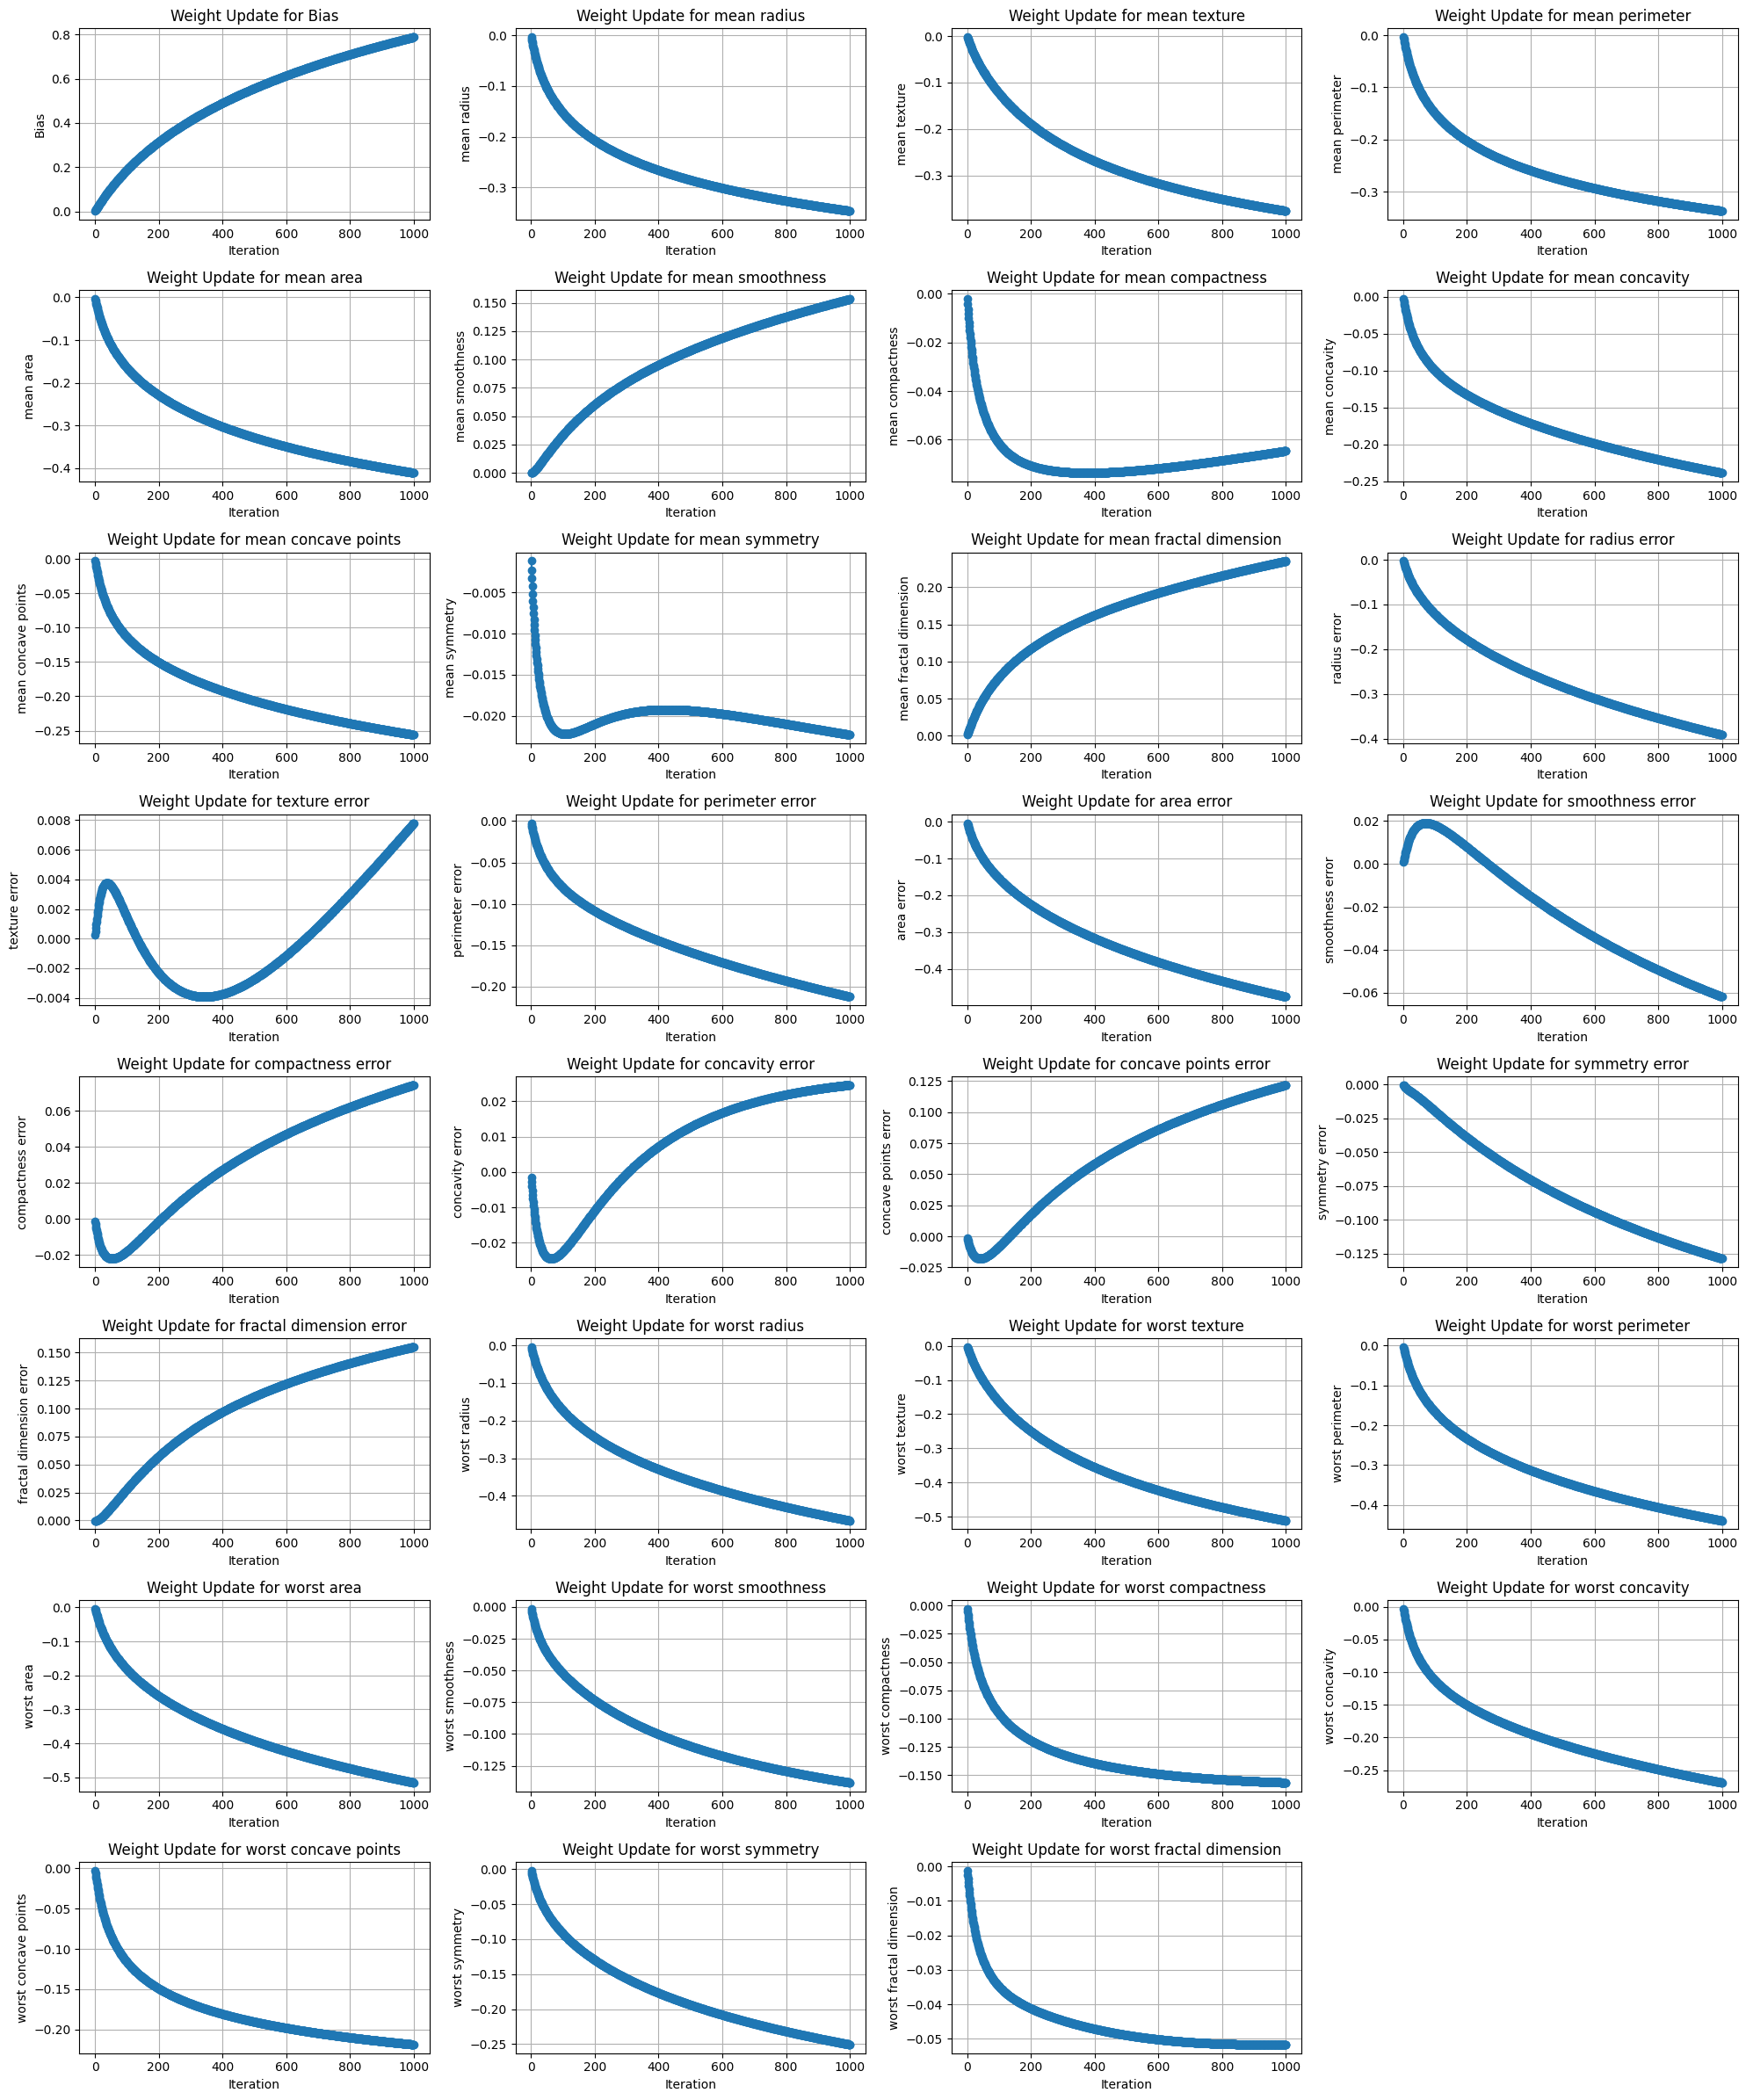

In [55]:
# =============================================================================
# 6. Plot the Value of Weights per Iteration
# =============================================================================

# Convert the list of weight vectors to a NumPy array for easier plotting.
weight_history_arr = np.array(weight_history)

weight_names = ['Bias'] + features

# Create a 2x2 grid for plotting.
fig, axs = plt.subplots(8, 4, figsize=(20, 24))
axs = axs.flatten()

for j in range(weight_history_arr.shape[1]):
    axs[j].plot(range(1, len(weight_history_arr) + 1), weight_history_arr[:, j],
                marker='o', linestyle='-')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel(weight_names[j])
    axs[j].set_title(f'Weight Update for {weight_names[j]}')
    axs[j].grid(True)

# Hide any unused subplots.
for k in range(weight_history_arr.shape[1], len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()

In [56]:
# =============================================================================
# 7. Build a Function for the Final Logistic Regression Model
# =============================================================================

# Build and display the final regression model equation.
# The model is: p = sigmoid( w0 + w1 * (scaled feature1) + w2 * (scaled feature2) and so on)
equation = f"{final_weights[0]:.4f}"
for idx, feature in enumerate(features, start=1):
    coef = final_weights[idx]
    if coef >= 0:
        equation += f" + {coef:.4f}*{feature}"
    else:
        equation += f" - {abs(coef):.4f}*{feature}"

print("Final Logistic Regression Model:")
print("p = sigmoid( " + equation + " )")


Final Logistic Regression Model:
p = sigmoid( 0.7887 - 0.3459*mean radius - 0.3762*mean texture - 0.3362*mean perimeter - 0.4106*mean area + 0.1534*mean smoothness - 0.0645*mean compactness - 0.2384*mean concavity - 0.2560*mean concave points - 0.0223*mean symmetry + 0.2352*mean fractal dimension - 0.3910*radius error + 0.0078*texture error - 0.2124*perimeter error - 0.4753*area error - 0.0619*smoothness error + 0.0743*compactness error + 0.0247*concavity error + 0.1220*concave points error - 0.1285*symmetry error + 0.1552*fractal dimension error - 0.4659*worst radius - 0.5118*worst texture - 0.4388*worst perimeter - 0.5155*worst area - 0.1383*worst smoothness - 0.1567*worst compactness - 0.2691*worst concavity - 0.2185*worst concave points - 0.2506*worst symmetry - 0.0516*worst fractal dimension )


In [57]:
# =============================================================================
# 8. Sample Test Data and Apply Standard Scaling
# =============================================================================

# Remove training observations to get the remaining data.
remaining_df = df.drop(train_df.index)

# Randomly sample 30 observations for testing using a different random state.
test_df = remaining_df.sample(n, random_state=seed+1)
print("Test Data Sample:")
test_df.head()


Test Data Sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.13890,0.1582,0.1804,0.09608,0.2664,0.07809,1
351,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,24.17,119.40,915.3,0.15500,0.5046,0.6872,0.21350,0.4245,0.10500,0
417,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,0.06864,...,27.65,157.10,1748.0,0.15170,0.4002,0.4211,0.21340,0.3003,0.10480,0
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,...,28.07,120.30,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.5401,0.5390,0.20600,0.4378,0.10720,0


In [58]:
# Create the test feature matrix and target vector.
X_test = test_df[features].values
y_test = test_df[target].values

# Scale test features using the same scaler fitted on the training data.
X_test_scaled = scaler.transform(X_test)

# Add a bias column to the scaled test features.
X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [59]:
# =============================================================================
# 9. Use the Logistic Regression Function for Prediction
# =============================================================================

# Compute predicted probabilities for the test set.
test_probs = sigmoid(X_test_aug.dot(final_weights))
# Classify using 0.5 as threshold.
predictions = (test_probs >= 0.5).astype(int)

# Display a few predictions alongside actual labels.
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("Predictions on Test Set:")
print(results.head())


Predictions on Test Set:
   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          0
4       0          0


In [60]:
# =============================================================================
# 10. Calculate for Errors
# =============================================================================

accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, test_probs)
f1 = f1_score(y_test, predictions)


print(f"Accuracy on Test Set: {accuracy*100:.2f}%")
print(f"F1 Score on Test Set: {f1:.4f}")
print(f"AUC on Test Set: {auc:.4f}")

Accuracy on Test Set: 96.67%
F1 Score on Test Set: 0.9756
AUC on Test Set: 0.9947
